In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
import pandas as pd
import attr
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from courier_snap.models.base import YobaParser
from courier_snap.utils import get_project_path

In [8]:
parser = YobaParser()
task = parser.from_input_json(get_project_path() / "task-data" / "data" / "contest_input.json")

e:\source\personal\courrier-snap\.venv\lib\site-packages\ipykernel_launcher.py:8: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



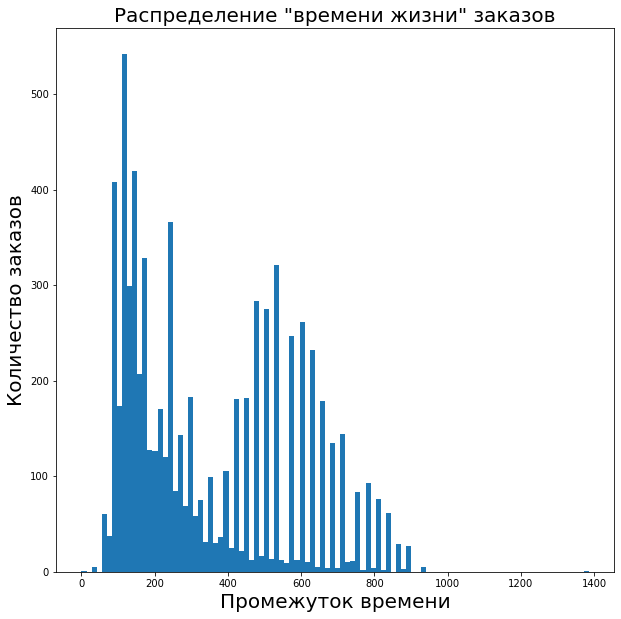

In [83]:
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
ax.hist([order.dropoff_time.end - order.pickup_time.start  for order in task.orders.values()], bins=100)
ax.set_title("Распределение \"времени жизни\" заказов", fontsize=20)
ax.set_xlabel("Промежуток времени", fontsize=20)
ax.set_ylabel("Количество заказов", fontsize=20)

fig.show()

e:\source\personal\courrier-snap\.venv\lib\site-packages\ipykernel_launcher.py:10: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



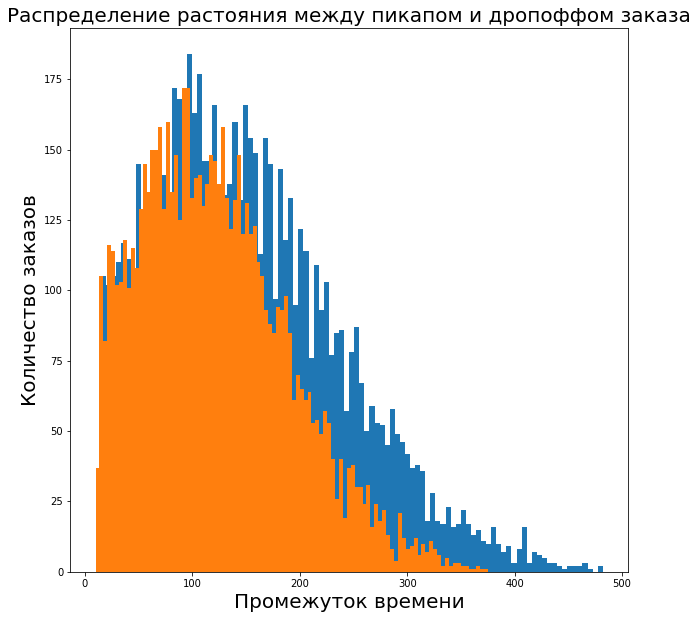

In [91]:
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
ax.hist([order.dropoff_location.cost(order.pickup_location, loc_type="cityblock")  for order in task.orders.values()], bins=100)
ax.hist([order.dropoff_location.cost(order.pickup_location) for order in task.orders.values()], bins=100)

ax.set_title("Распределение растояния между пикапом и дропоффом заказа", fontsize=20)
ax.set_xlabel("Промежуток времени", fontsize=20)
ax.set_ylabel("Количество заказов", fontsize=20)

fig.show()

[Order(id=10004, pickup_point_id=40004, pickup_location=(233, 108), pickup_time=start=05:00, end=05:30, dropoff_point_id=60004, dropoff_location=(236, 165), dropoff_time=start=07:00, end=07:30, payment=302), Order(id=10006, pickup_point_id=40006, pickup_location=(233, 108), pickup_time=start=04:00, end=04:30, dropoff_point_id=60006, dropoff_location=(179, 128), dropoff_time=start=05:30, end=06:00, payment=298), Order(id=10026, pickup_point_id=40026, pickup_location=(138, 217), pickup_time=start=05:00, end=06:00, dropoff_point_id=60026, dropoff_location=(227, 150), dropoff_time=start=14:29, end=07:00, payment=410), Order(id=10032, pickup_point_id=40032, pickup_location=(233, 108), pickup_time=start=05:00, end=05:30, dropoff_point_id=60032, dropoff_location=(360, 117), dropoff_time=start=06:00, end=06:30, payment=413), Order(id=10035, pickup_point_id=40035, pickup_location=(233, 108), pickup_time=start=04:00, end=04:30, dropoff_point_id=60035, dropoff_location=(229, 146), dropoff_time=st

e:\source\personal\courrier-snap\.venv\lib\site-packages\ipykernel_launcher.py:11: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



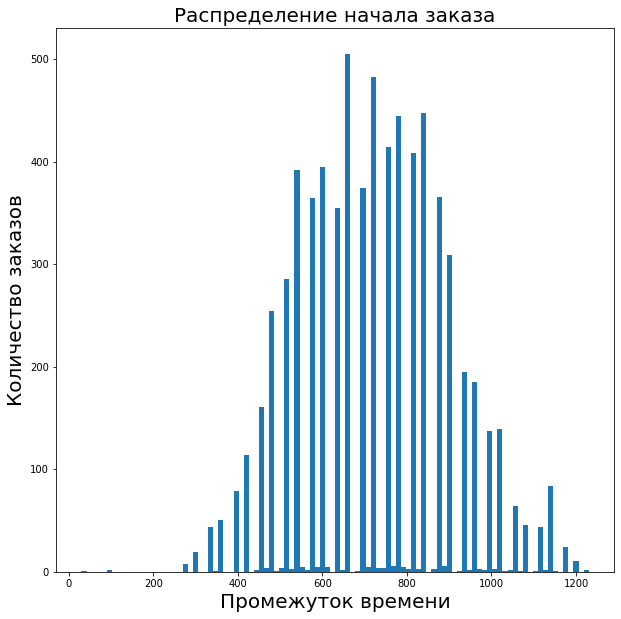

In [114]:
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
ax.hist([order.pickup_time.end  for order in task.orders.values()], bins=100)

print([order for order in task.orders.values() if order.pickup_time.end <= 360])

ax.set_title("Распределение начала заказа", fontsize=20)
ax.set_xlabel("Промежуток времени", fontsize=20)
ax.set_ylabel("Количество заказов", fontsize=20)

fig.show()

Dropoff: 1.64%, Pickups: 1.64%


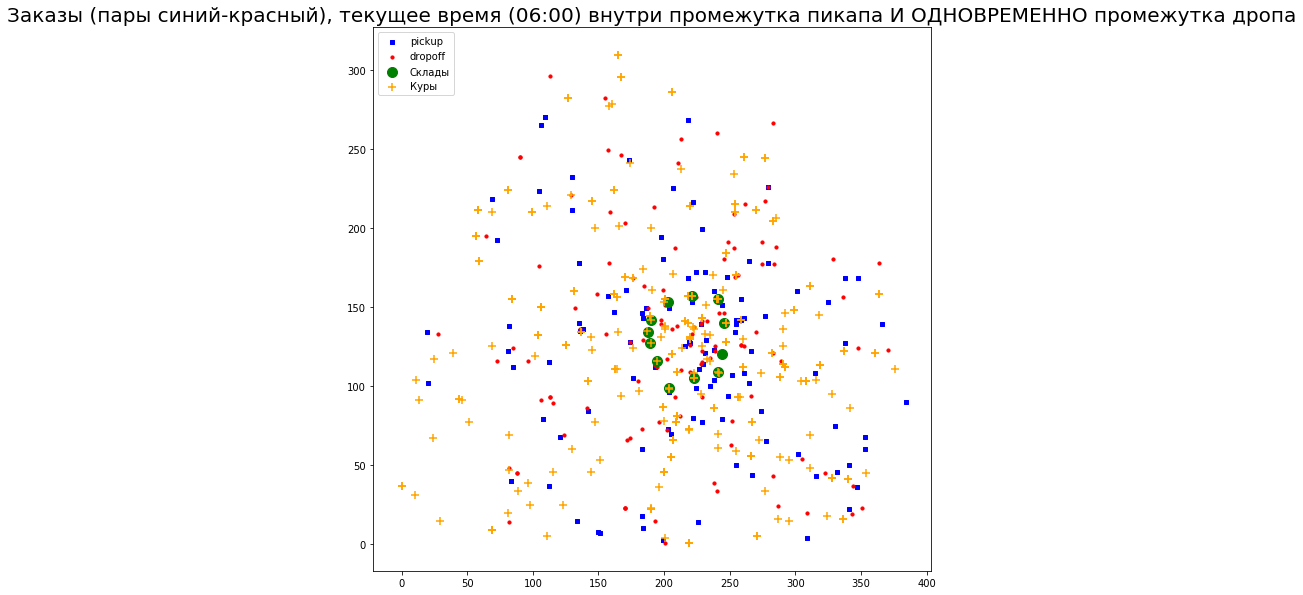

Dropoff: 5.31%, Pickups: 5.31%


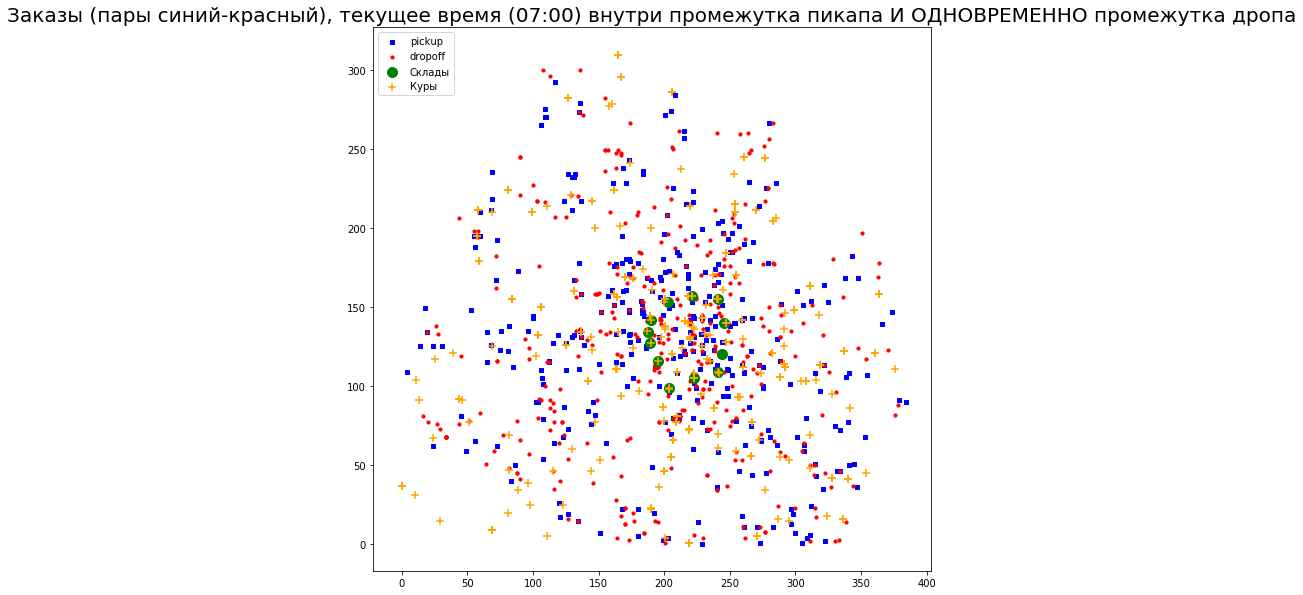

Dropoff: 11.93%, Pickups: 11.93%


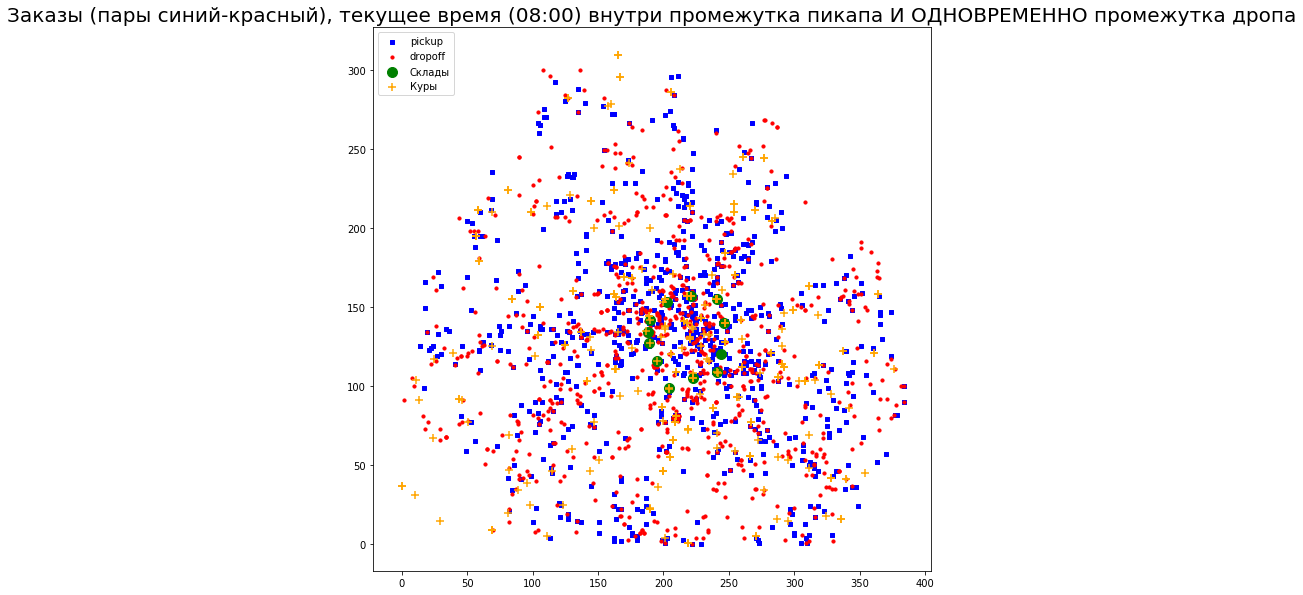

Dropoff: 16.87%, Pickups: 16.87%


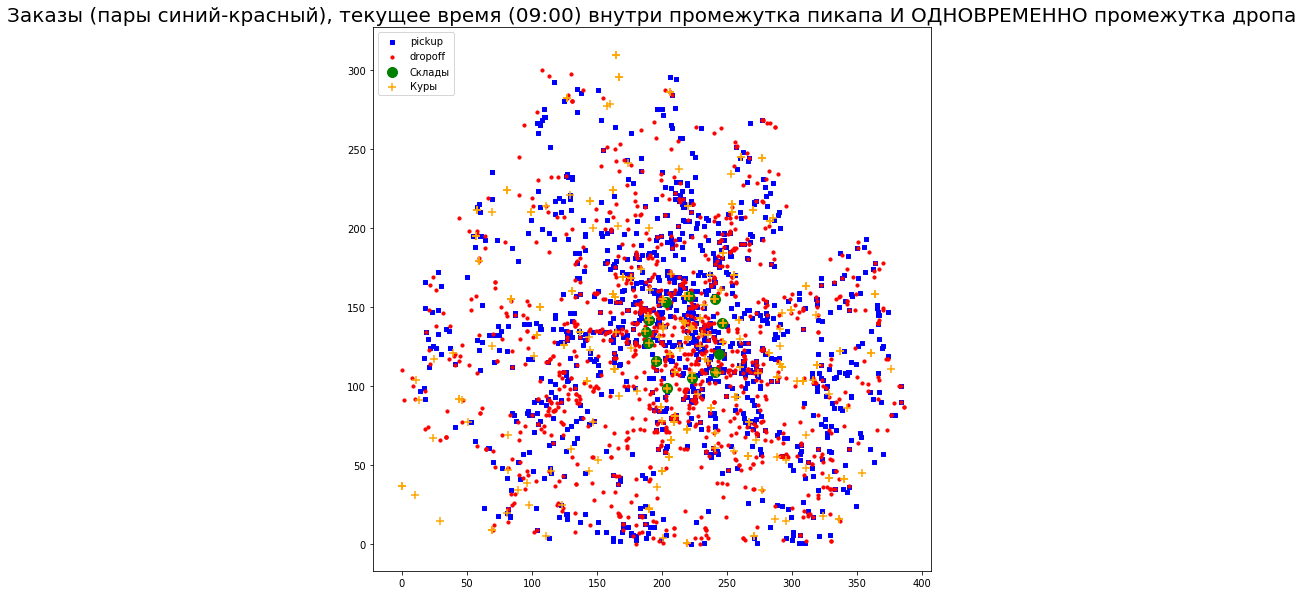

Dropoff: 18.46%, Pickups: 18.46%


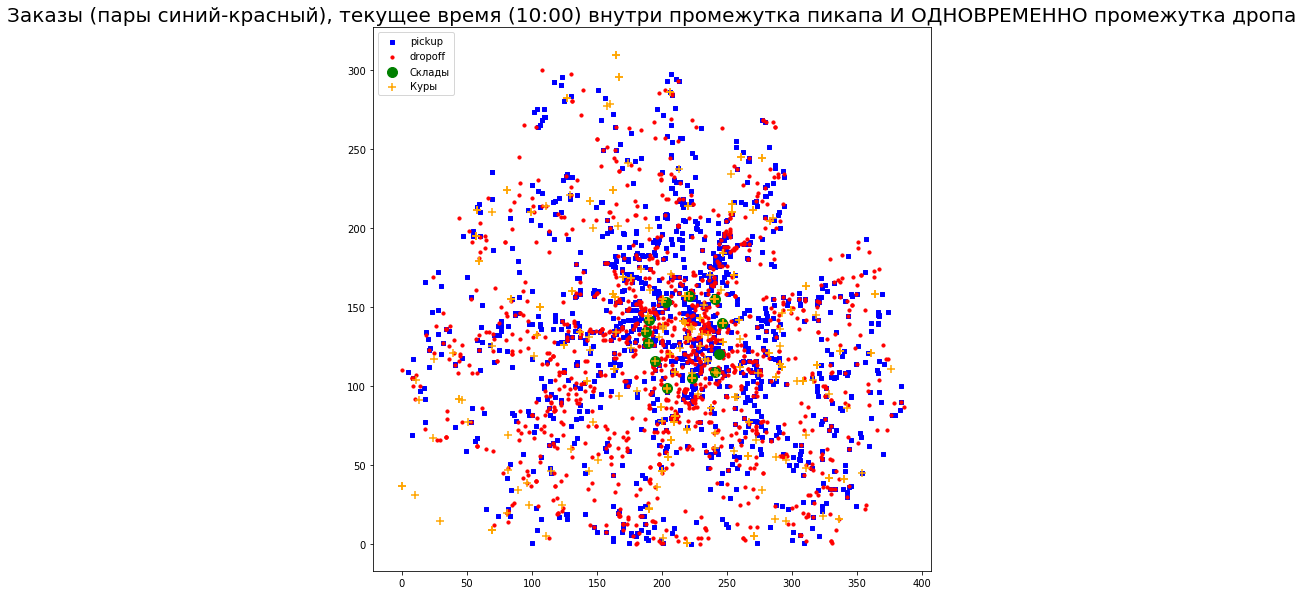

Dropoff: 20.80%, Pickups: 20.80%


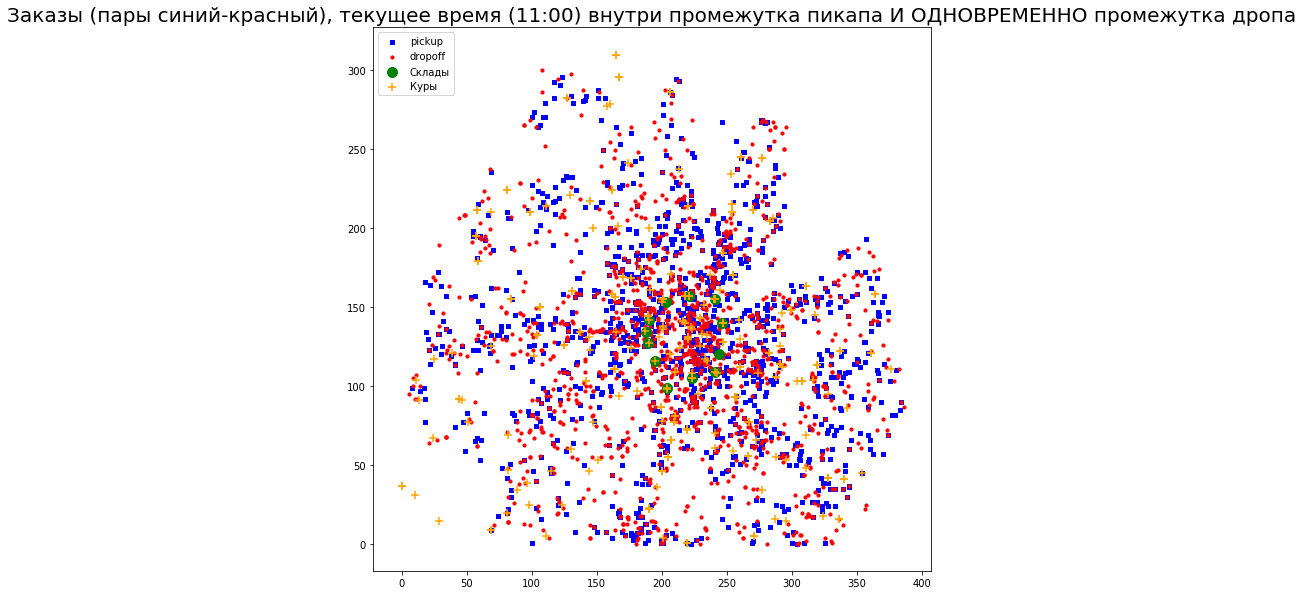

Dropoff: 20.95%, Pickups: 20.95%


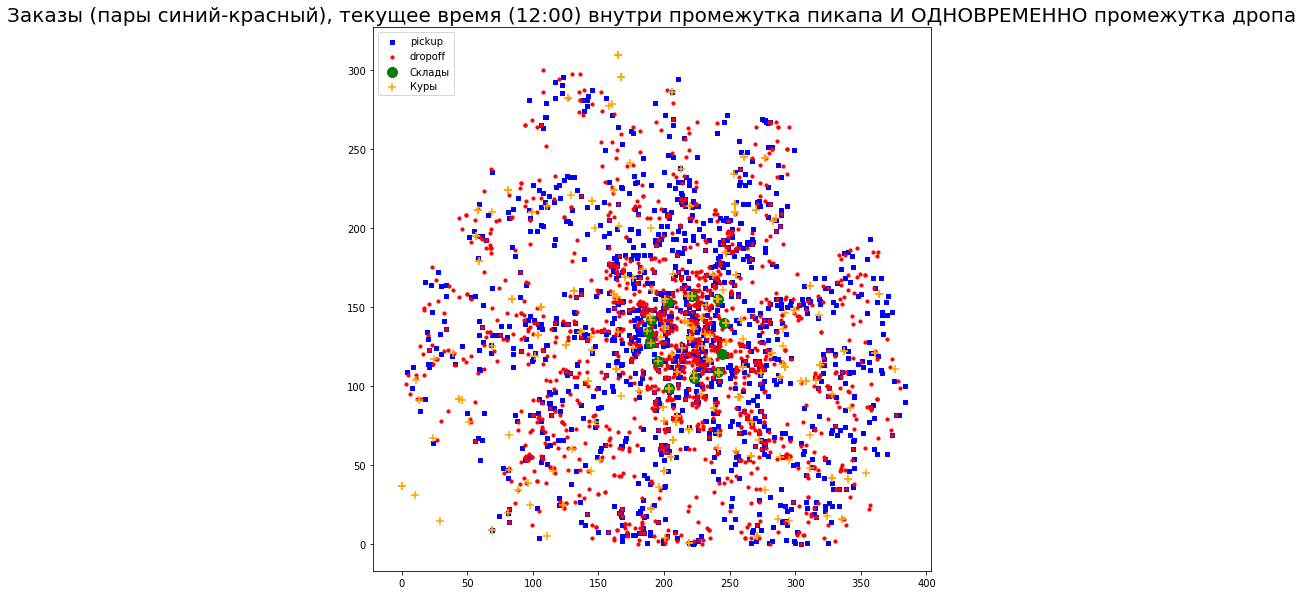

Dropoff: 18.42%, Pickups: 18.42%


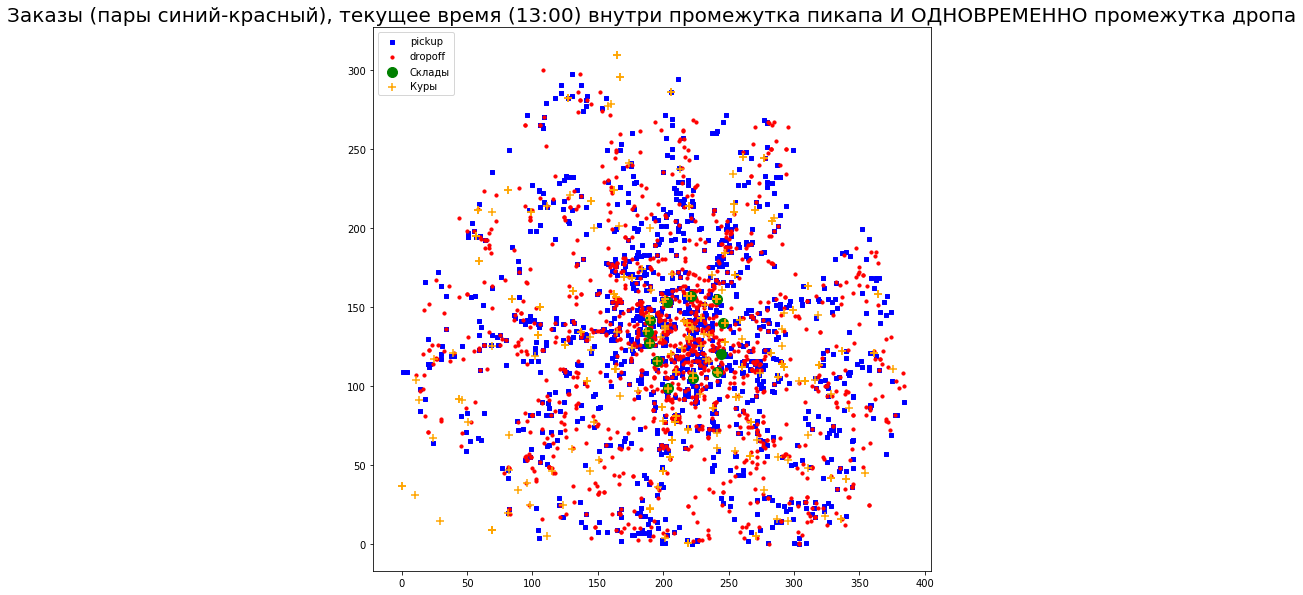

Dropoff: 14.39%, Pickups: 14.39%


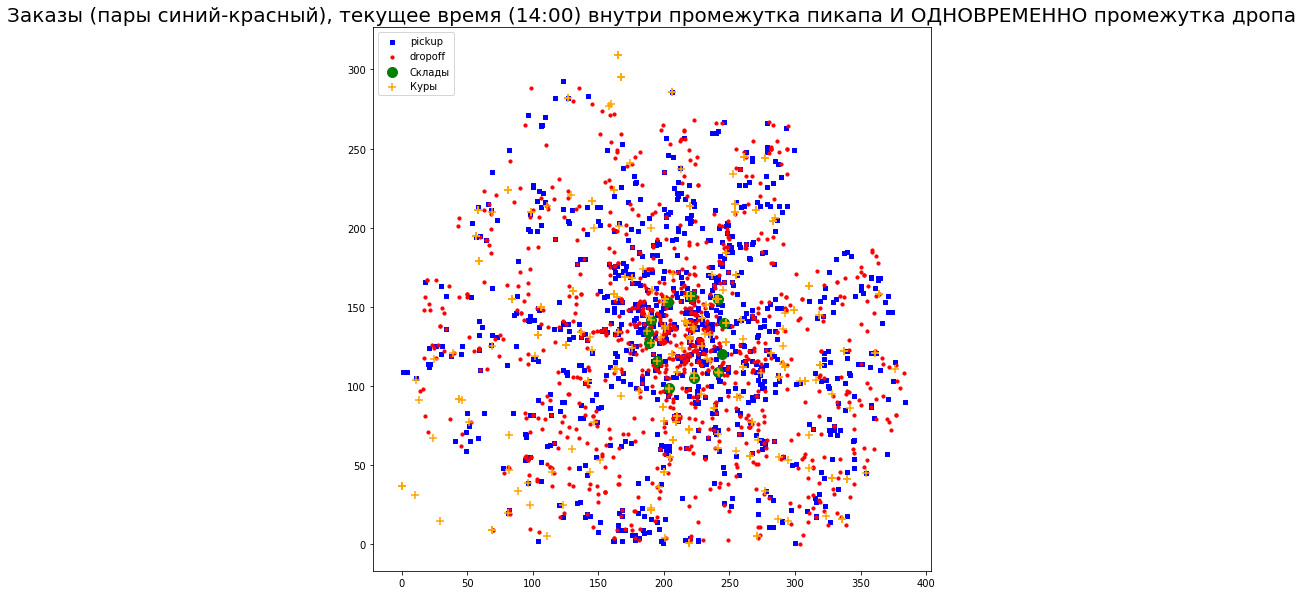

Dropoff: 8.37%, Pickups: 8.37%


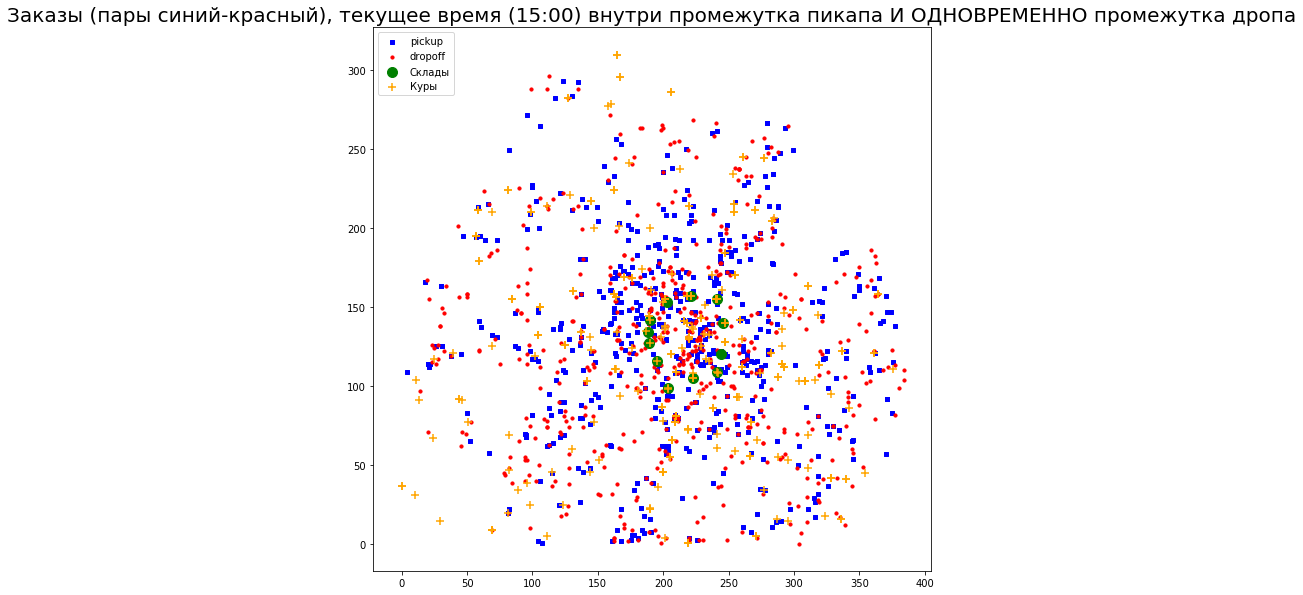

Dropoff: 5.45%, Pickups: 5.45%


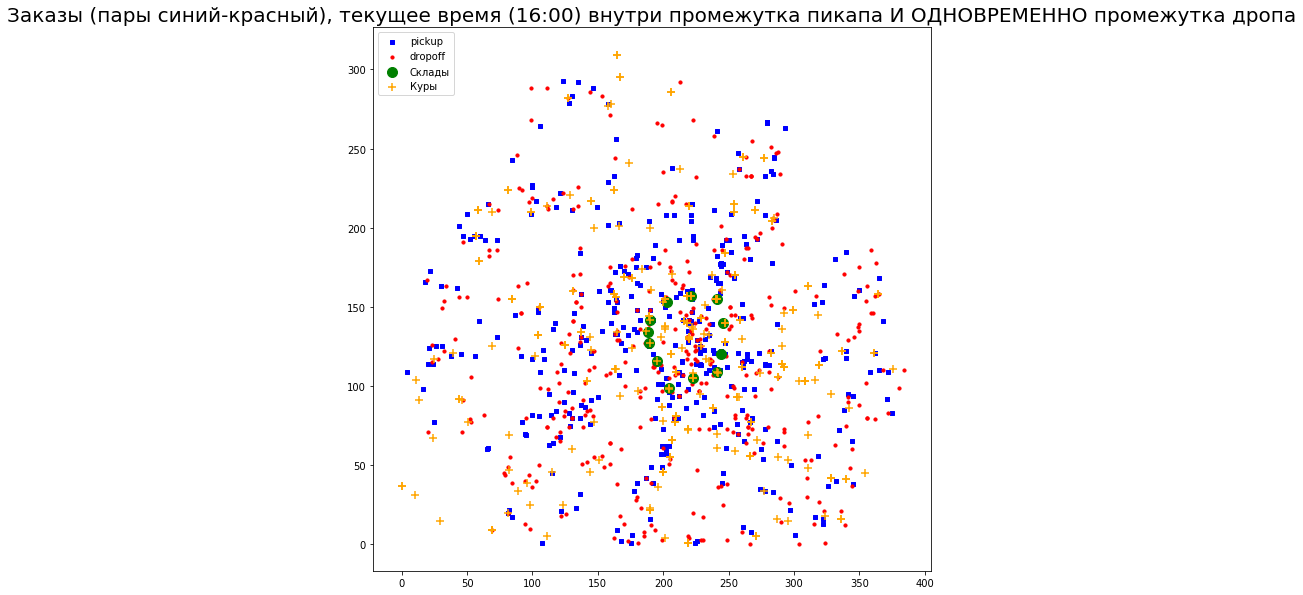

Dropoff: 3.78%, Pickups: 3.78%


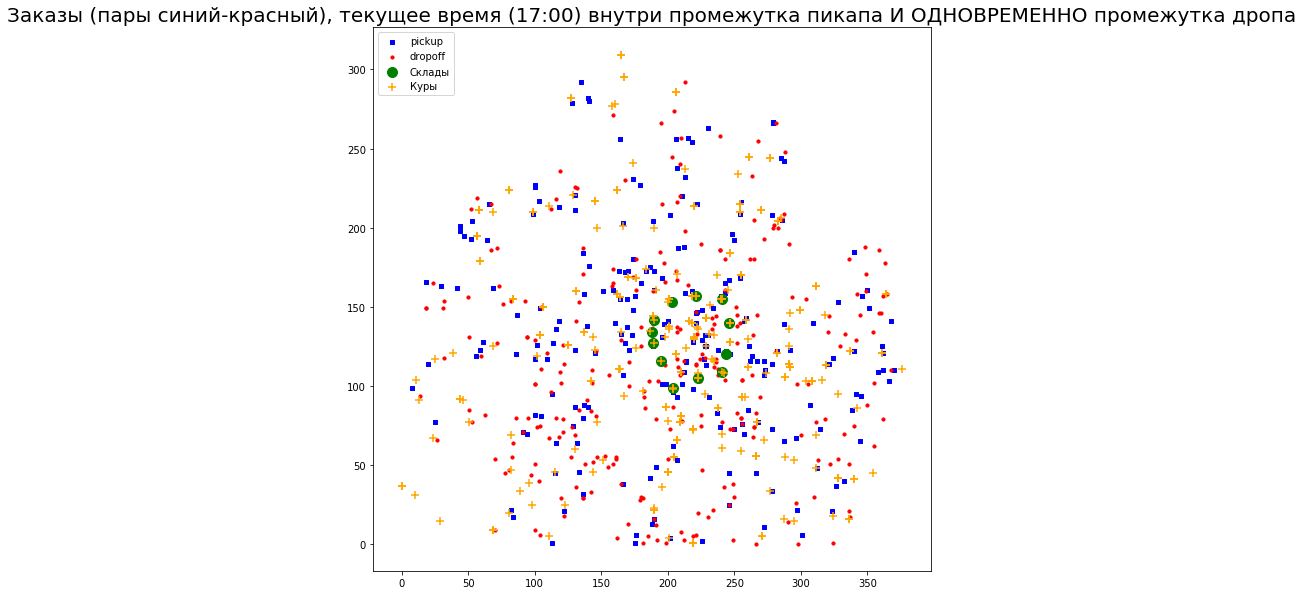

Dropoff: 2.11%, Pickups: 2.11%


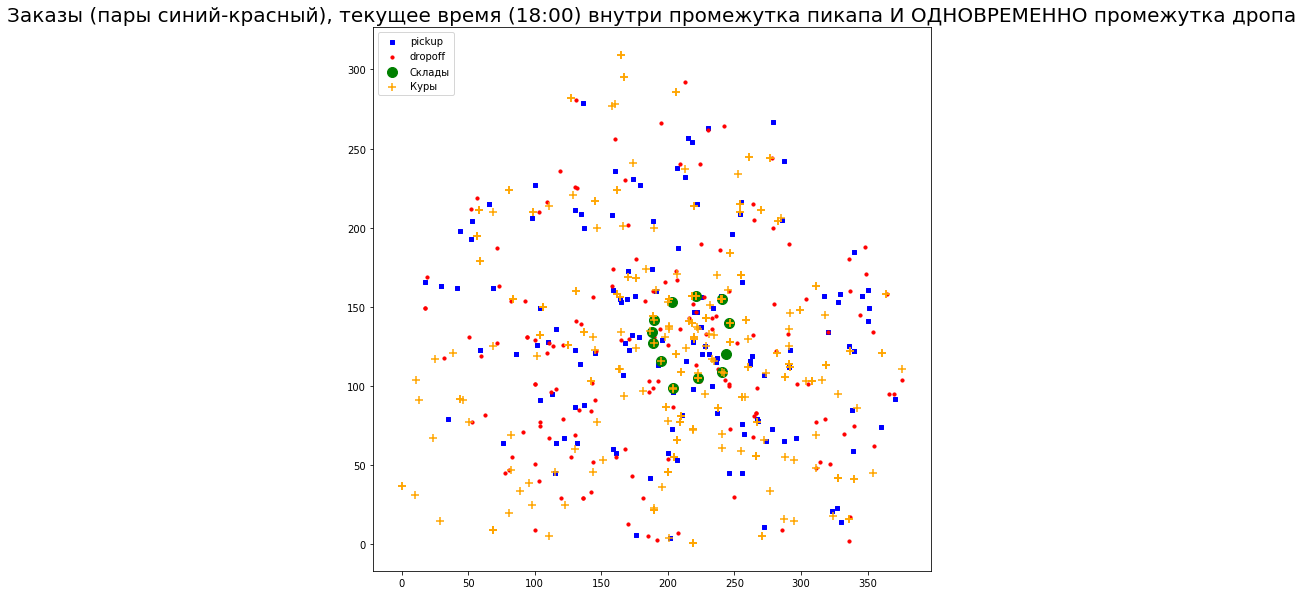

Dropoff: 1.51%, Pickups: 1.51%


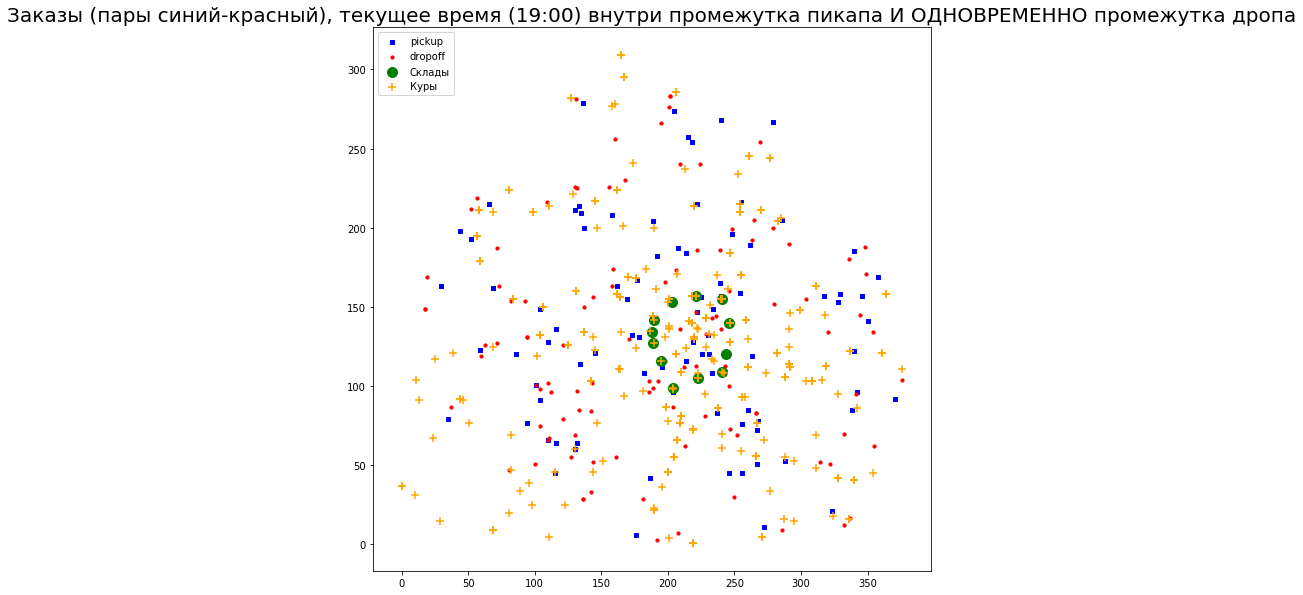

Dropoff: 0.15%, Pickups: 0.15%


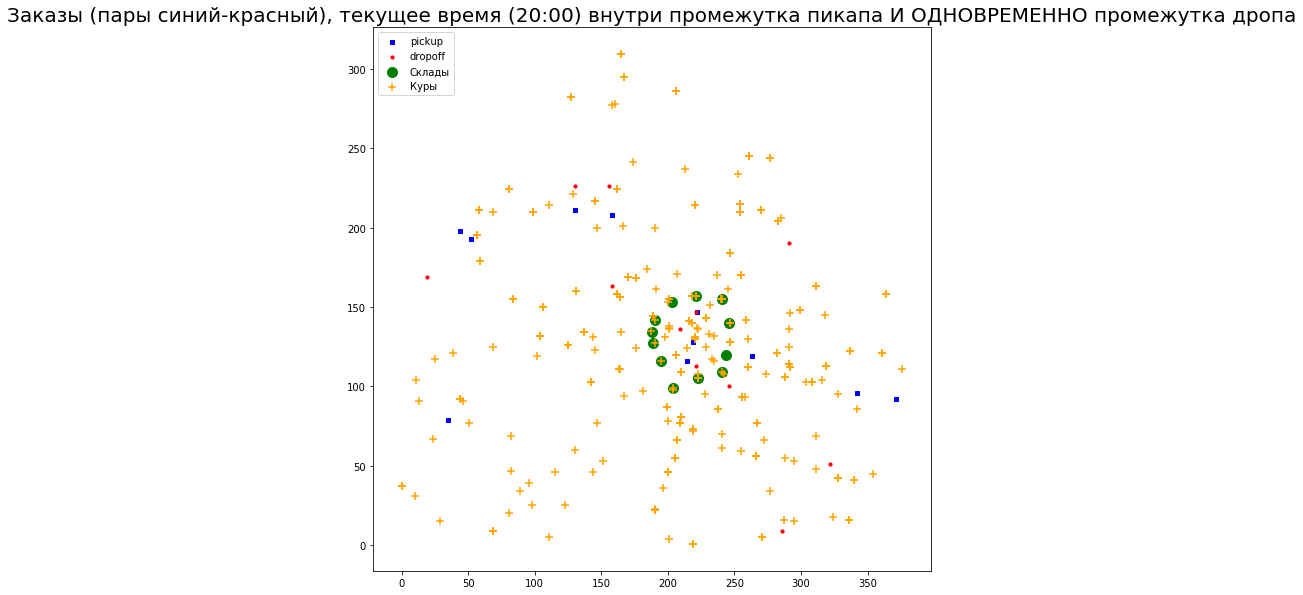

Dropoff: 0.00%, Pickups: 0.00%


TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

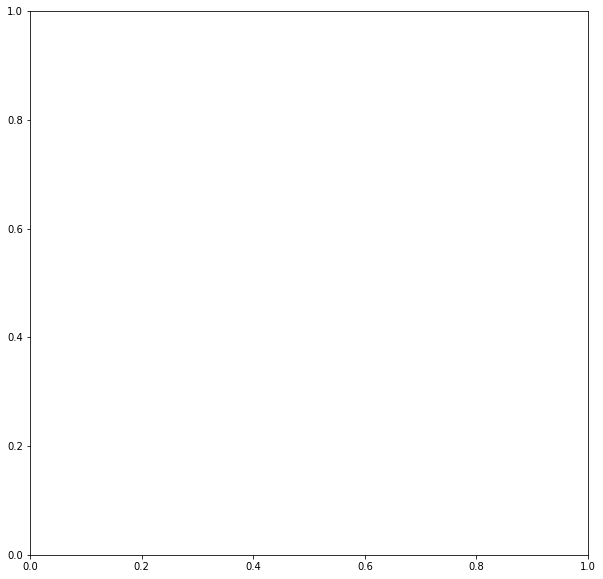

In [140]:
def plot_orders_at_time(at_time: int, plot_pickups: bool = True, plot_dropoffs: bool = True):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)

    viable_pickup_points = [
        order for order in task.orders.values() 
        if current_time in order.pickup_time 
        and current_time in order.dropoff_time 
        and order.pickup_location.distance(order.dropoff_location) <= 500
    ]
    viable_dropoff_points = [
        order for order in task.orders.values() 
        if current_time in order.pickup_time 
        and current_time in order.dropoff_time 
        and order.pickup_location.distance(order.dropoff_location) <= 500
    ]
    print(f"Dropoff: {len(viable_dropoff_points)/len(task.orders)*100:.2f}%, Pickups: {len(viable_pickup_points)/len(task.orders)*100:.2f}%")
    if plot_pickups:
        ax.scatter(*np.array([attr.astuple(order.pickup_location) for order in viable_pickup_points]).T, s=10, c='b', marker="s", label='pickup')
    if plot_dropoffs:
        ax.scatter(*np.array([attr.astuple(order.dropoff_location) for order in viable_dropoff_points]).T, s=10, c='r', marker="o", label='dropoff')
    ax.scatter(*np.array([(depot.x, depot.y) for depot in task.depots.values()]).T, s=100, c='g', label='Склады')
    ax.scatter(*np.array([attr.astuple(courier.location) for courier in task.couriers.values()]).T, s=50, c='orange', label='Куры', marker='+')
    ax.set_title(f"Заказы (пары синий-красный), текущее время ({current_time // 60:02d}:{current_time % 60:02d}) "
                 f"внутри промежутка пикапа И ОДНОВРЕМЕННО промежутка дропа", fontsize=20)
    plt.legend(loc='upper left')
    plt.show()

for current_time in range(360, 1441, 60):
    plot_orders_at_time(current_time)


In [ ]:
def 